### COSTANERA GAMA ABM: PARAMETERS ADJUSTMENT PREPROCESSING

#### Imports and data load

In [1]:
# Imports

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot

In [2]:
# Reads the pickle files and store them in memory as DataFrames

hogar_df = pd.read_pickle("./pkl/HOGAR.pkl")
persona_df = pd.read_pickle("./pkl/PERSONA.pkl")
tipo_asiento_df = pd.read_pickle("./pkl/Tipo Asiento.pkl")
viajes_df = pd.read_pickle("./pkl/VIAJES_LAB.pkl")

In [3]:
# Remove the '#' in the following line if it is required processing of CONCEPCION people only
# persona_df = persona_df[persona_df['COMUNA']=='CONCEPCION']

#### Basic data exploration

In [4]:
hogar_df.head()


,Id,Folio,DireccionCalle,DireccionNumero,DireccionDepto,DireccionPiso,DireccionComuna,Coord_Hogar,Zona_Hogar,IdSector,...,FEH*FCHTH,IngresoMod,Estrato,FLab_2016,FSab_2016,FDom_2016,FTotal_2016,DireccionTelefono1_anon,DireccionTelefono2_anon,Encuestador_anon
0,1,800011.0,PLAYA BRAVA,1178,.,.,TALCAHUANO,"-36.714635, -73.138159",211.0,4,...,37.657484,600000.0,2,39.065853,0.0,0.0,35.883249,4a7cbbd293813907500750c6538c38db8e951ae564e42b...,f3f6d1113c414d6b2ecd47eddd3870c578c9578d921a10...,a07c380b53349b0cb9f063f0676e070e1e2f41e823a431...
1,2,800012.0,PLAYA LAS BALZAS,1101,.,.,TALCAHUANO,"-36.714635, -73.138159",211.0,4,...,141.829419,580000.0,2,82.115282,0.0,0.0,70.956238,787f4ac95c127ceb7fb0ffd45ab7034eea53a8ae65b6aa...,f3f6d1113c414d6b2ecd47eddd3870c578c9578d921a10...,a07c380b53349b0cb9f063f0676e070e1e2f41e823a431...
2,3,800021.0,JUAN JOSE MANZANO,82,.,.,CONCEPCION,"-36.810853, -73.028669",811.0,1,...,35.549236,600000.0,2,47.784849,0.0,0.0,42.372774,98f83fe8b539f90f6644e08571438337ed7f2b4fee6598...,f3f6d1113c414d6b2ecd47eddd3870c578c9578d921a10...,811599b811834405bb20c2bf5e1007875757c054b3afdd...
3,4,800022.0,IRARRAZABAL,855,.,.,CONCEPCION,"-36.810853, -73.028669",811.0,1,...,92.137875,182000.0,1,39.527745,0.0,0.0,35.085122,98f83fe8b539f90f6644e08571438337ed7f2b4fee6598...,f3f6d1113c414d6b2ecd47eddd3870c578c9578d921a10...,811599b811834405bb20c2bf5e1007875757c054b3afdd...
4,5,800031.0,JOSE ZAMBRANO OPAZO,1186,.,.,CORONEL,"-36.994425, -73.147444",2830.0,9,...,48.952110,1250000.0,3,82.299423,0.0,0.0,47.369403,b4229877c79922eb35f82a35826975d07f36c3106a4244...,f3f6d1113c414d6b2ecd47eddd3870c578c9578d921a10...,37768d2041cab665a7f804ab21eff81abb527198c89e25...


In [5]:
persona_df.head()

,Id,Folio,ordenpersona,DiaEntrevista,MesEntrevista,HoraEntrevista,MinutoEntrevista,Sexo,Parentesco,MesNacimiento,...,FEP*FCTH*FCSE,IngresoMod,FLab_2015,FSab_2015,FDom_2015,FTotal_2015,TelefonoContacto1_anon,TelefonoContacto2_anon,Encuestador_anon,Nombre_anon
0,364,800011.0,1.0,8.0,8.0,15.0,0.0,1.0,1.0,4.0,...,36.892817,600000,52.157739,0.0,0.0,46.923991,11c24a5ee89a6d69cc44c8688a0cf9ae70567a886fc0ed...,3f700a329526c667b3a316b496e08cb4a570b37ce46666...,085a954d32f41a41f935fee64ffba86d2bd9b8fbebc328...,ddbbea38709264e4941509a77c32aaea5a3b1cb8291fe3...
1,365,800011.0,2.0,8.0,8.0,15.0,10.0,2.0,2.0,2.0,...,45.856684,0,52.870303,0.0,0.0,48.196786,11c24a5ee89a6d69cc44c8688a0cf9ae70567a886fc0ed...,3f700a329526c667b3a316b496e08cb4a570b37ce46666...,085a954d32f41a41f935fee64ffba86d2bd9b8fbebc328...,cafcf357ff61ce65c3e313ea6282de1ebb548a660ce7e9...
2,366,800011.0,3.0,8.0,8.0,15.0,30.0,2.0,3.0,9.0,...,39.723055,0,55.935987,0.0,0.0,51.974396,11c24a5ee89a6d69cc44c8688a0cf9ae70567a886fc0ed...,3f700a329526c667b3a316b496e08cb4a570b37ce46666...,085a954d32f41a41f935fee64ffba86d2bd9b8fbebc328...,f8b9509b5b4fb489f291a4e9cba6dbfa3d5e6de1edac4b...
3,367,800012.0,1.0,22.0,6.0,13.0,58.0,1.0,1.0,12.0,...,105.634103,300000,53.357253,0.0,0.0,46.941473,b51f5c68095bf0e8e5419ea9f435147bf562d44cd49de0...,3f700a329526c667b3a316b496e08cb4a570b37ce46666...,085a954d32f41a41f935fee64ffba86d2bd9b8fbebc328...,f4d39aa0d3ddad84225d1ec044282e1f53f8ea2189aebc...
4,368,800012.0,2.0,22.0,6.0,14.0,34.0,2.0,2.0,6.0,...,164.368676,80000,52.870303,0.0,0.0,48.196786,b51f5c68095bf0e8e5419ea9f435147bf562d44cd49de0...,3f700a329526c667b3a316b496e08cb4a570b37ce46666...,085a954d32f41a41f935fee64ffba86d2bd9b8fbebc328...,c2d00230ae2bf46138d4b471b86bbeb5944acabcb4a343...


In [6]:
tipo_asiento_df.head()

,Id,Concatenado,Folio,IdFolio,OrdenPersona,OrdenViaje,OrdenEtapa,ModoEtapa,CuadrasCaminadasAntes,MinutosCaminadosAntes,...,Zona_LugarBajoVehiculo,Sector_LugarBajoVehiculo,DondeEstacionoVehiculo,LugarEstacionoVehiculo,MontoPagoEstacionamiento,TipoPagoEstacionamiento,LugarEstacionoBicicleta,FactorExpansionE,KEY_Etapa,Campo38
0,1,8000113,800011,800011.0,3.0,1.0,1.0,4.0,1.0,2.0,...,,,NaN,NaN,NaN,,,1.0,800011_3_1,
1,2,8000113,800011,800011.0,3.0,2.0,1.0,4.0,2.0,4.0,...,,,NaN,NaN,NaN,,,1.0,800011_3_2,
2,3,8000121,800012,800012.0,1.0,1.0,1.0,4.0,NaN,NaN,...,,,NaN,NaN,NaN,,,1.0,800012_1_1,
3,4,8000122,800012,800012.0,2.0,1.0,1.0,4.0,NaN,NaN,...,,,NaN,NaN,NaN,,,1.0,800012_2_1,
4,5,8000122,800012,800012.0,2.0,2.0,1.0,4.0,NaN,NaN,...,,,NaN,NaN,NaN,,,1.0,800012_2_2,


In [7]:
viajes_df.head()

,Id,Campo1,Folio,ordenpersona,ordenviaje,PropositoEstraus,Proposito,Proposito Volver Casa,Proposito_e,OrigenActividadComuna,...,COMUNA DESTINO VIAJE,Distancia Viaje,FEP,FCTH,FCSE,FEP*FCTH*FCSE,Per_Mod,ModoInf,Ftotal,FLaboral
0,27,8000113,800011.0,3.0,1.0,3,11.0,NaN,,TALCAHUANO,...,TALCAHUANO,mayor a 10 km,44.525486,0.89884425609,0.9925434444,39.723055,4,5,51.974396,55.935987
1,28,8000113,800011.0,3.0,2.0,3,7.0,11.0,,TALCAHUANO,...,TALCAHUANO,mayor a 10 km,44.525486,0.89884425609,0.9925434444,39.723055,5,5,51.974396,55.935987
2,29,8000121,800012.0,1.0,1.0,3,7.0,7.0,,CONCEPCION,...,TALCAHUANO,mayor a 10 km,44.525486,3.2218169397,0.73636750398,105.634103,2,5,46.941473,53.357253
3,30,8000122,800012.0,2.0,1.0,1,1.0,NaN,,TALCAHUANO,...,HUALPEN,mayor a 10 km,44.525486,3.2218169397,1.1458018656,164.368676,1,5,48.196786,52.870303
4,31,8000122,800012.0,2.0,2.0,1,7.0,1.0,,HUALPEN,...,TALCAHUANO,mayor a 10 km,44.525486,3.2218169397,1.1458018656,164.368676,5,5,48.196786,52.870303


#### Insights about the distribution of different profiles

Using the age, the income, and the activities of the people, we can approximate the profile distribution to be used in the GAMA simulation

First, we use the age range (RangoEdad), the existing categories in the survey are:  

 1 -> 0-5 y.o.   
 2 -> 6-13 y.o.  
 3 -> 14-17 y.o.   
 4 -> 18-24 y.o.   
 5 -> 25-55 y.o.   
 6 -> 56-64 y.o.   
 7 -> +65 y.o.   

In [8]:
persona_df.RangoEdad

0        5.0
1        5.0
2        5.0
3        6.0
4        5.0
        ... 
26323    7.0
26324    5.0
26325    5.0
26326    3.0
26327    2.0
Name: RangoEdad, Length: 26328, dtype: float64

In [9]:
age1 = persona_df[persona_df['RangoEdad'] == 1]
age2 = persona_df[persona_df['RangoEdad'] == 2]
age3 = persona_df[persona_df['RangoEdad'] == 3]
age4 = persona_df[persona_df['RangoEdad'] == 4]
age5 = persona_df[persona_df['RangoEdad'] == 5]
age6 = persona_df[persona_df['RangoEdad'] == 6]
age7 = persona_df[persona_df['RangoEdad'] == 7]


print('''
Nº of surveyed by age:
  
Number of people in range 1: %s
Number of people in range 2: %s
Number of people in range 3: %s
Number of people in range 4: %s
Number of people in range 5: %s
Number of people in range 6: %s
Number of people in range 7: %s
      ''' % (len(age1),len(age2),len(age3),len(age4)
             ,len(age5),len(age6),len(age7)))


Nº of surveyed by age:
  
Number of people in range 1: 1694
Number of people in range 2: 2526
Number of people in range 3: 1397
Number of people in range 4: 3064
Number of people in range 5: 10905
Number of people in range 6: 2881
Number of people in range 7: 3861
      


([<matplotlib.patches.Wedge at 0x1a0ab18b9a0>,
 [Text(1.0776038017799732, 0.2208394131248962, '0-5 y.o.'),
  Text(0.8372813797278605, 0.7134142493397579, '6-13 y.o.'),
  Text(0.4253134475859536, 1.014449836760079, '14-17 y.o.'),
  Text(-0.14839240898713482, 1.0899448118849848, '18-24 y.o.'),
  Text(-1.0706880960794336, -0.25224393137159506, '25-55 y.o.'),
  Text(0.33094326120806067, -1.049036013614868, '56-64 y.o.'),
  Text(0.9853086105812773, -0.4890469731164819, '+65 y.o.')])

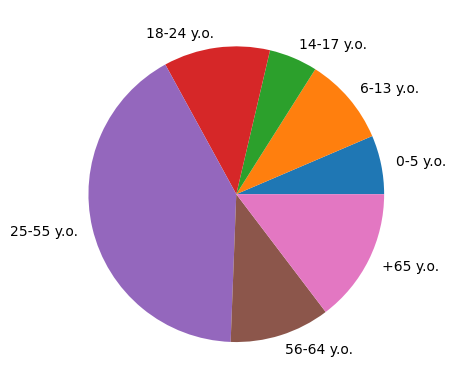

In [10]:
pyplot.pie([len(age1),len(age2),len(age3),len(age4),len(age5),len(age6),len(age7)], labels = ["0-5 y.o.", "6-13 y.o.", "14-17 y.o.", "18-24 y.o.", "25-55 y.o.", "56-64 y.o.", "+65 y.o."])

##### Profile creation
To obtain the children, we use the people in age ranges 1 and 2.  

The HS students would be the people in age3 with 'ActividadEstudia' set to 1 ('ActividadEstudia' == 'IsStudent').  

The College students would be the people in age4 with 'ActividadEstudia' set to 1 ('ActividadEstudia' == 'IsStudent').  

Retirees are people in age range 7.

In [11]:
children = pd.concat([age1, age2])
hs_student = age3[age3['ActividadEstudia'] == 1]
college_student = age4[age4['ActividadEstudia'] == 1]
retirees = age7

The adults would be people in age range 5 and 6.  

The adults that are home makers are those whose 'ActividadDuenaCasa' is set to 1 ('ActividadDuenaCasa' == 'IsHomeMaker')  

The adults that have a job are those whose 'ActividadTrabaja' is set to 1 ('ActividadTrabaja' == 'HasAJob') 

In [12]:
adults =  pd.concat([age5, age6])

adult_rest = adults[adults['ActividadTrabaja'] == 1]
adults_home_maker = adults[adults['ActividadDuenaCasa'] == 1]

print('''
Home Makers: %s
Rest of adults: %s
      ''' % (len(adults_home_maker),len(adult_rest)))


Home Makers: 3376
Rest of adults: 8321
      


To obtain different groups for the adults that have a job, we use their income.

One possibility is using KMeans to obtain 3 groups of salaries. The higuer salary would be the Executives, the medium salary the mid-career workers, and the low salary the young professionals

In [13]:
# We select the adults that have a not null salary
adult_rest = adult_rest[adult_rest['IngresoPersonal'].notnull()]

In [14]:
# For the rest of adults, we create the clusters using their income


ingresos_array = adult_rest.IngresoPersonal.to_numpy().reshape(-1,1)

salary_kmeans = KMeans(n_clusters=3, random_state=43, n_init='auto')
salary_kmeans.fit(ingresos_array)

KMeans(n_clusters=3, n_init='auto', random_state=43)

In [15]:
print(salary_kmeans.cluster_centers_)

[[ 660004.95540139]
 [ 252379.3583468 ]
 [1428710.31746032]]


In [16]:
# Looking at the centroids:
# Cluster 1 -> low salary (young professional)
# Cluster 0 -> medium salary (mid-career workers)
# Cluster 2 -> high salary (executives)


def get_cluster(row):
    return salary_kmeans.predict(np.array(row['IngresoPersonal']).reshape(-1, 1))
    
adult_rest['SalaryCluster'] = adult_rest.apply(lambda row: get_cluster(row), axis=1)  

In [17]:
young_professionals = adult_rest[adult_rest['SalaryCluster'] == 1]
mid_career = adult_rest[adult_rest['SalaryCluster'] == 0]
executives = adult_rest[adult_rest['SalaryCluster'] == 2]

Finally, we can obtain the number and the distribution of the different profiles

In [18]:
# With the data obtained, we can calculate the distribution of the profiles

hs_student_number = len(hs_student)
college_student_number = len(college_student)
young_professionals_number = len(young_professionals)
mid_career_number = len(mid_career)
executives_number = len(executives)
adults_home_maker_number = len(adults_home_maker)
retirees_number = len(retirees)

print('''
Number of HS students: %s
Number of College students: %s
Number of Young professionals: %s
Number of Mid-Career workers: %s
Number of Executives: %s
Number of Home Maker: %s
Number of Retirees: %s
      ''' % (hs_student_number,college_student_number,young_professionals_number
             ,mid_career_number,executives_number,adults_home_maker_number,retirees_number))


Number of HS students: 1337
Number of College students: 2032
Number of Young professionals: 4331
Number of Mid-Career workers: 2018
Number of Executives: 504
Number of Home Maker: 3376
Number of Retirees: 3861
      


In [19]:
total = hs_student_number + college_student_number + young_professionals_number + mid_career_number + executives_number + adults_home_maker_number + retirees_number

print('''
Dsitribution to be used in the GAMA model (Profiles.csv):      
      
Proportion of HS students: %s
Proportion of College students: %s
Proportion of Young professionals: %s
Proportion of Mid-Career workers: %s
Proportion of Executives: %s
Proportion of Home Makers: %s
Proportion of Retirees: %s      
      ''' % (hs_student_number/total,college_student_number/total,young_professionals_number/total
             ,mid_career_number/total,executives_number/total,adults_home_maker_number/total,retirees_number/total))


Dsitribution to be used in the GAMA model (Profiles.csv):      
      
Proportion of HS students: 0.07657941462855834
Proportion of College students: 0.11638696374362793
Proportion of Young professionals: 0.24806689959333295
Proportion of Mid-Career workers: 0.11558508505641789
Proportion of Executives: 0.028867632739561257
Proportion of Home Makers: 0.19336731771579127
Proportion of Retirees: 0.22114668652271036      
      


([<matplotlib.patches.Wedge at 0x1a0b049e220>,
 [Text(1.0683195909730228, 0.26209397464122147, 'H.S. Students'),
  Text(0.7286197038600577, 0.8240833253663625, 'College Students'),
  Text(-0.44951291176518615, 1.0039612254247592, 'Young Professionals'),
  Text(-1.0999700645659471, 0.00811523621261627, 'Mid-Career Workers'),
  Text(-0.9921916822117672, -0.474927010970932, 'Executives'),
  Text(-0.4547456789962539, -1.001601900674233, 'Home Makers'),
  Text(0.8450332057149096, -0.704215081661266, 'Retirees')],
 [Text(0.582719776894376, 0.14296034980430258, '7.7%'),
  Text(0.3974289293782132, 0.44949999565437954, '11.6%'),
  Text(-0.24518886096282877, 0.5476152138680503, '24.8%'),
  Text(-0.5999836715814256, 0.004426492479608874, '11.6%'),
  Text(-0.5411954630246002, -0.25905109689323563, '2.9%'),
  Text(-0.24804309763432025, -0.5463283094586725, '19.3%'),
  Text(0.46092720311722335, -0.38411731726978143, '22.1%')])

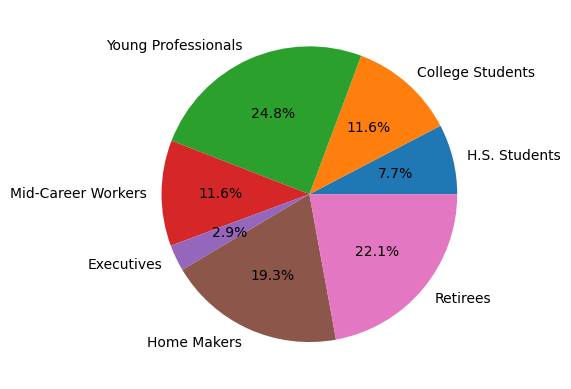

In [20]:
profiles = ["H.S. Students", "College Students", "Young Professionals", "Mid-Career Workers", "Executives", "Home Makers", "Retirees"]
pyplot.pie([hs_student_number,college_student_number,young_professionals_number,mid_career_number,executives_number,adults_home_maker_number,retirees_number], labels = profiles, autopct='%1.1f%%',)

Aprox: Probability of having a car ~= probability of having drivers license  
'TenenciaLicenciaConducir' != 6.0 is equal to 'DriversLicense' == 'Yes'

In [21]:

hs_student_prob_car = len(hs_student[hs_student['TenenciaLicenciaConducir'] != 6.0]) / len(hs_student)
college_student_prob_car = len(college_student[college_student['TenenciaLicenciaConducir'] != 6.0]) / len(college_student)
young_professionals_prob_car = len(young_professionals[young_professionals['TenenciaLicenciaConducir'] != 6.0]) / len(young_professionals)
mid_career_prob_car = len(mid_career[mid_career['TenenciaLicenciaConducir'] != 6.0]) / len(mid_career)
executives_prob_car = len(executives[executives['TenenciaLicenciaConducir'] != 6.0]) / len(executives)
adults_home_maker_prob_car = len(adults_home_maker[adults_home_maker['TenenciaLicenciaConducir'] != 6.0]) / len(adults_home_maker)
retirees_prob_car = len(retirees[retirees['TenenciaLicenciaConducir'] != 6.0]) /  len(retirees)

print('''
Dsitribution to be used in the GAMA model (Profiles.csv):      
      
Probabilty of having a car HS students: %s
Probabilty of having a car College students: %s
Probabilty of having a car Young professionals: %s
Probabilty of having a car Mid-Career workers: %s
Probabilty of having a car Executives: %s
Probabilty of having a car Home Maker: %s
Probabilty of having a car Retirees: %s      
      ''' % (hs_student_prob_car,college_student_prob_car,young_professionals_prob_car
             ,mid_career_prob_car,executives_prob_car,adults_home_maker_prob_car,retirees_prob_car))


Dsitribution to be used in the GAMA model (Profiles.csv):      
      
Probabilty of having a car HS students: 0.004487658937920718
Probabilty of having a car College students: 0.2155511811023622
Probabilty of having a car Young professionals: 0.3334102978526899
Probabilty of having a car Mid-Career workers: 0.7101090188305252
Probabilty of having a car Executives: 0.9206349206349206
Probabilty of having a car Home Maker: 0.1481042654028436
Probabilty of having a car Retirees: 0.16653716653716655      
      


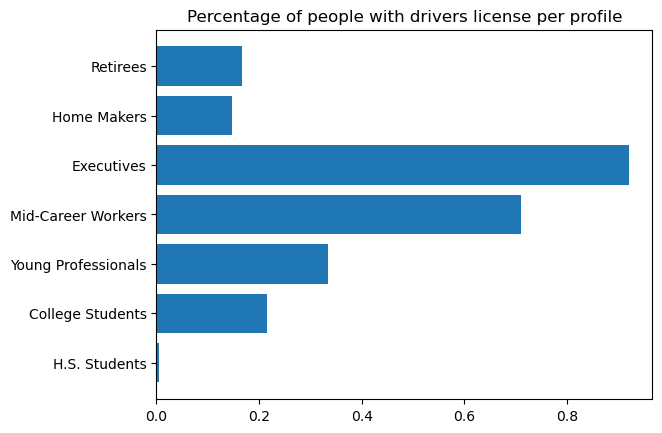

In [22]:
fig, ax = pyplot.subplots()

probs = [hs_student_prob_car, college_student_prob_car, young_professionals_prob_car, mid_career_prob_car, executives_prob_car, adults_home_maker_prob_car, retirees_prob_car]

ax.barh(profiles, probs)

ax.set_title('Percentage of people with drivers license per profile')

pyplot.show()

#### Travels processing

To gain insights of the travels of each type of profiles, first, it is needed to merge the travels dataframe with the dataframes of each profiles.  
With this operation {profile}_travels will contain only the travels of that type of profile.

In [23]:
# Creation of new Dataframes merging the profiles with the travel information, we use left merge to ensure that all the entries of the DataFrame have travel information

hs_student_travels = pd.merge(viajes_df, hs_student, on=['Folio', 'ordenpersona'], how='left')
college_student_travels = pd.merge(viajes_df, college_student, on=['Folio', 'ordenpersona'], how='left')
young_professionals_travels = pd.merge(viajes_df, young_professionals, on=['Folio', 'ordenpersona'], how='left')
mid_career_travels = pd.merge(viajes_df, mid_career, on=['Folio', 'ordenpersona'], how='left')
executives_travels = pd.merge(viajes_df, executives, on=['Folio', 'ordenpersona'], how='left')
adults_home_maker_travels = pd.merge(viajes_df, adults_home_maker, on=['Folio', 'ordenpersona'], how='left')
retirees_travels = pd.merge(viajes_df, retirees, on=['Folio', 'ordenpersona'], how='left')

# As we are using left merge, we need to remove travels that are not of the profile

hs_student_travels=hs_student_travels.dropna(subset=['Nombre_anon'])
college_student_travels=college_student_travels.dropna(subset=['Nombre_anon'])
young_professionals_travels=young_professionals_travels.dropna(subset=['Nombre_anon'])
mid_career_travels=mid_career_travels.dropna(subset=['Nombre_anon'])
executives_travels=executives_travels.dropna(subset=['Nombre_anon'])
adults_home_maker_travels=adults_home_maker_travels.dropna(subset=['Nombre_anon'])
retirees_travels=retirees_travels.dropna(subset=['Nombre_anon'])


Now, we calculate the proportion of travels involving each of the transport modes, for each profile


In [24]:

def print_use_of_mode(mode):

      travels_hs_students_with_mode = filter_dataframe_by_mode(hs_student_travels, mode)
      travels_college_student_travels_with_mode = filter_dataframe_by_mode(college_student_travels, mode)
      travels_young_professionals_with_mode = filter_dataframe_by_mode(young_professionals_travels, mode)
      travels_mid_career_with_mode = filter_dataframe_by_mode(mid_career_travels, mode)
      travels_executives_with_mode = filter_dataframe_by_mode(executives_travels, mode)
      travels_adults_home_maker_with_mode = filter_dataframe_by_mode(adults_home_maker_travels, mode)
      travels_retirees_with_mode = filter_dataframe_by_mode(retirees_travels, mode)

      hs_student_prop_mode = len(travels_hs_students_with_mode) / len(hs_student_travels)
      college_student_prop_mode = len(travels_college_student_travels_with_mode) / len(college_student_travels)
      young_professionals_prop_mode = len(travels_young_professionals_with_mode) / len(young_professionals_travels)
      mid_career_prop_mode = len(travels_mid_career_with_mode) / len(mid_career_travels)
      executives_prop_mode = len(travels_executives_with_mode) / len(executives_travels)
      adults_home_maker_prop_mode = len(travels_adults_home_maker_with_mode) / len(adults_home_maker_travels)
      retirees_prop_mode = len(travels_retirees_with_mode) /  len(retirees_travels)

      print(('''
      Dsitribution to be used in the GAMA model (Profiles.csv):      
            
      Proportion of travels involving a ''' + mode + ''' HS students: %s
      Proportion of travels involving a ''' + mode + ''' College students: %s
      Proportion of travels involving a ''' + mode + ''' Young professionals: %s
      Proportion of travels involving a ''' + mode + ''' Mid-Career workers: %s
      Proportion of travels involving a ''' + mode + ''' Executives: %s
      Proportion of travels involving a ''' + mode + ''' Home Maker: %s
      Proportion of travels involving a ''' + mode + ''' Retirees: %s      
            ''') % (hs_student_prop_mode,college_student_prop_mode,young_professionals_prop_mode
                  ,mid_career_prop_mode,executives_prop_mode,adults_home_maker_prop_mode,retirees_prop_mode))
      
      return {'hs_student' : hs_student_prop_mode, 'college_student' : college_student_prop_mode, 'young_professional': young_professionals_prop_mode, 'mid_career': mid_career_prop_mode, 'executive':executives_prop_mode, 'home_maker': adults_home_maker_prop_mode, 'retiree': retirees_prop_mode} 

def mode_to_numbers(mode):
      if mode == 'Car':
            return [1,2,7,8]
      if mode == 'Bike':
            return [3]
      if mode == 'Walking':
            return [13]
      if mode == 'Bus':
            return [4,5,6,9,10]      
      
def filter_dataframe_by_mode(dataframe, mode):

      result_dataframe = pd.DataFrame()
      for mode_number in mode_to_numbers(mode):
            # filtered = dataframe[(dataframe['ModoEtapa1'] == mode_number) | (dataframe['ModoE2'] == mode_number) | (dataframe['ModoE3'] == mode_number) | (dataframe['ModoE4'] == mode_number)]
            filtered = dataframe[(dataframe['ModoEtapa1'] == mode_number)]
            result_dataframe = pd.concat([result_dataframe,  filtered])
      
      return result_dataframe

In [25]:
freq_bike = print_use_of_mode('Bike')


      Dsitribution to be used in the GAMA model (Profiles.csv):      
            
      Proportion of travels involving a Bike HS students: 0.007381676074685193
      Proportion of travels involving a Bike College students: 0.022411953041622197
      Proportion of travels involving a Bike Young professionals: 0.039792387543252594
      Proportion of travels involving a Bike Mid-Career workers: 0.012386248736097068
      Proportion of travels involving a Bike Executives: 0.009716599190283401
      Proportion of travels involving a Bike Home Maker: 0.0063630940544839925
      Proportion of travels involving a Bike Retirees: 0.013198416190057193      
            


In [26]:
freq_car = print_use_of_mode('Car')


      Dsitribution to be used in the GAMA model (Profiles.csv):      
            
      Proportion of travels involving a Car HS students: 0.16109422492401215
      Proportion of travels involving a Car College students: 0.13580576307363929
      Proportion of travels involving a Car Young professionals: 0.24369747899159663
      Proportion of travels involving a Car Mid-Career workers: 0.5343781597573306
      Proportion of travels involving a Car Executives: 0.6777327935222672
      Proportion of travels involving a Car Home Maker: 0.2976734937363293
      Proportion of travels involving a Car Retirees: 0.24967003959524858      
            


In [27]:
freq_bus = print_use_of_mode('Bus')


      Dsitribution to be used in the GAMA model (Profiles.csv):      
            
      Proportion of travels involving a Bus HS students: 0.5623100303951368
      Proportion of travels involving a Bus College students: 0.6702241195304163
      Proportion of travels involving a Bus Young professionals: 0.47565496786950073
      Proportion of travels involving a Bus Mid-Career workers: 0.3402426693629929
      Proportion of travels involving a Bus Executives: 0.16275303643724695
      Proportion of travels involving a Bus Home Maker: 0.33525551799562536
      Proportion of travels involving a Bus Retirees: 0.3827540695116586      
            


In [28]:
freq_walking = print_use_of_mode('Walking')


      Dsitribution to be used in the GAMA model (Profiles.csv):      
            
      Proportion of travels involving a Walking HS students: 0.265740338688667
      Proportion of travels involving a Walking College students: 0.1651547491995731
      Proportion of travels involving a Walking Young professionals: 0.2309688581314879
      Proportion of travels involving a Walking Mid-Career workers: 0.1064206268958544
      Proportion of travels involving a Walking Executives: 0.145748987854251
      Proportion of travels involving a Walking Home Maker: 0.3573275004971167
      Proportion of travels involving a Walking Retirees: 0.35217773867135943      
            


In [29]:
def get_survey_frequencies(profile):
    mean_freq_walking = 6 - profile["FreqCaminata"].mean()
    mean_freq_car = 6 - profile["FreqPrivado"].mean()
    mean_freq_bus = 6 - profile["FreqBus"].mean()
    mean_freq_bike = 6 - profile["FreqBicicleta"].mean()

    sumatory = mean_freq_walking + mean_freq_car + mean_freq_bus + mean_freq_bike
    return mean_freq_walking / sumatory, mean_freq_car / sumatory, mean_freq_bus / sumatory, mean_freq_bike / sumatory

In [30]:
# Objective frequencies of the use of vehicles in the GAMA simulation

def get_mode_choice_profile(profile):

      profile_to_df = {'hs_student' : hs_student, 'college_student' : college_student, 'young_professional': young_professionals,
                        'mid_career': mid_career, 'executive':executives, 'home_maker': adults_home_maker, 'retiree': retirees}       
      profile_freq_survey_walking, profile_freq_survey_car, profile_freq_survey_bus, profile_freq_survey_bike = get_survey_frequencies(profile_to_df.get(profile))

      profile_freq_combin_walking = freq_walking.get(profile)
      profile_freq_combin_car = freq_car.get(profile)
      profile_freq_combin_bus = freq_bus.get(profile)
      profile_freq_combin_bike = freq_bike.get(profile)


      summ = profile_freq_combin_walking + profile_freq_combin_car + profile_freq_combin_bus + profile_freq_combin_bike
      diff_from_1 = 1 - summ

      profile_freq_combin_walking += diff_from_1 * profile_freq_survey_walking
      profile_freq_combin_car += diff_from_1 * profile_freq_survey_car
      profile_freq_combin_bus += diff_from_1 * profile_freq_survey_bus
      profile_freq_combin_bike += diff_from_1 * profile_freq_survey_bike

      print('''
      Mode Choice ''' + profile + ''' (Profiles.csv) [Survey & Travels]:      
            
      Percentage of walking: %s
      Percentage of car: %s
      Percentage of bus: %s
      Percentage of bike: %s
            ''' % (profile_freq_combin_walking, profile_freq_combin_car,
                  profile_freq_combin_bus, profile_freq_combin_bike))
      
      modes = ["Walking", "Car", "Bus", "Bike"]

      fig, ax = pyplot.subplots()


      ax.pie([profile_freq_combin_walking,profile_freq_combin_car,profile_freq_combin_bus,profile_freq_combin_bike], labels = modes, autopct='%1.1f%%', colors=["green", "red", "blue", "yellow"],textprops={"color": "black", "backgroundcolor": "white"})


      ax.set(aspect="equal", title='Mode Choice for ' + profile)
      pyplot.show()

      


      Mode Choice hs_student (Profiles.csv) [Survey & Travels]:      
            
      Percentage of walking: 0.266949188439452
      Percentage of car: 0.16183222591334837
      Percentage of bus: 0.5633722561895058
      Percentage of bike: 0.007846329457693873
            


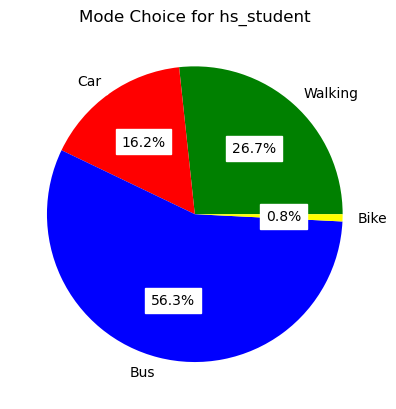

In [31]:
get_mode_choice_profile('hs_student')


      Mode Choice college_student (Profiles.csv) [Survey & Travels]:      
            
      Percentage of walking: 0.1673080534099776
      Percentage of car: 0.13713279169075135
      Percentage of bus: 0.6722953258453334
      Percentage of bike: 0.0232638290539376
            


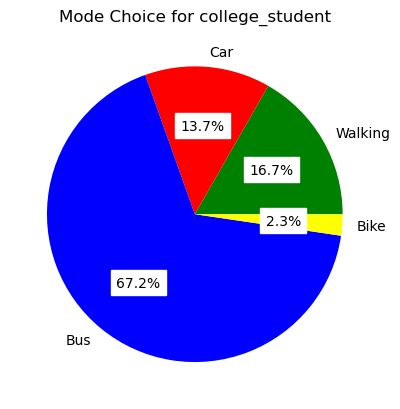

In [32]:
get_mode_choice_profile('college_student')


      Mode Choice young_professional (Profiles.csv) [Survey & Travels]:      
            
      Percentage of walking: 0.23450702957675373
      Percentage of car: 0.2458075587456264
      Percentage of bus: 0.47873373130507824
      Percentage of bike: 0.040951680372541675
            


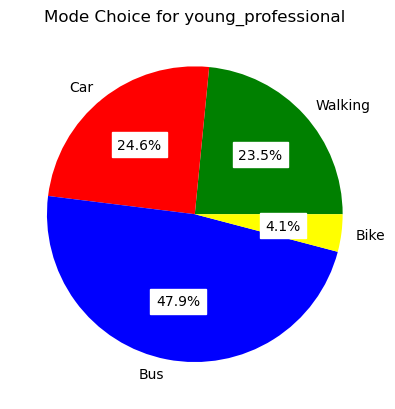

In [33]:
get_mode_choice_profile('young_professional')


      Mode Choice mid_career (Profiles.csv) [Survey & Travels]:      
            
      Percentage of walking: 0.10860267020648735
      Percentage of car: 0.5362654231795744
      Percentage of bus: 0.3419801423533517
      Percentage of bike: 0.013151764260586453
            


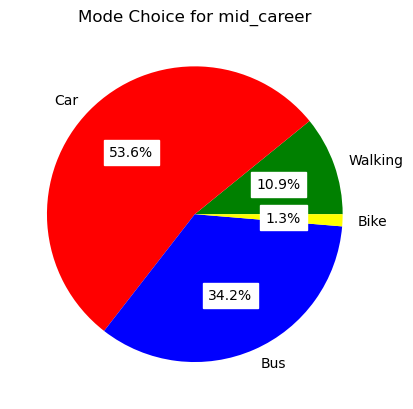

In [34]:
get_mode_choice_profile('mid_career')


      Mode Choice executive (Profiles.csv) [Survey & Travels]:      
            
      Percentage of walking: 0.14705297195715067
      Percentage of car: 0.6790829204449845
      Percentage of bus: 0.16357341981816131
      Percentage of bike: 0.010290687779703381
            


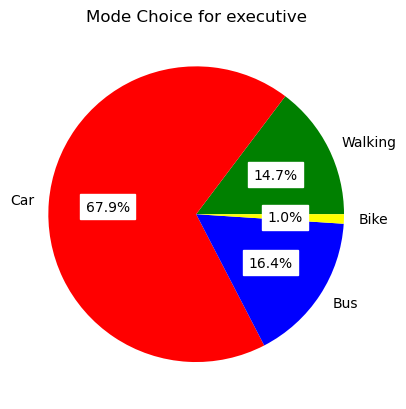

In [35]:
get_mode_choice_profile('executive')


      Mode Choice home_maker (Profiles.csv) [Survey & Travels]:      
            
      Percentage of walking: 0.35859541161336195
      Percentage of car: 0.2984505351717008
      Percentage of bus: 0.3362533089175401
      Percentage of bike: 0.006700744297397125
            


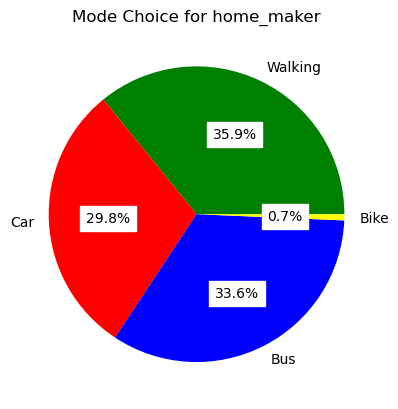

In [36]:
get_mode_choice_profile('home_maker')


      Mode Choice retiree (Profiles.csv) [Survey & Travels]:      
            
      Percentage of walking: 0.3530063812014614
      Percentage of car: 0.25017551556310097
      Percentage of bus: 0.383394114370236
      Percentage of bike: 0.013423988865201514
            


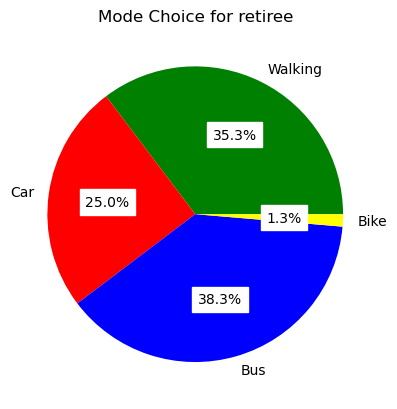

In [37]:
get_mode_choice_profile('retiree')

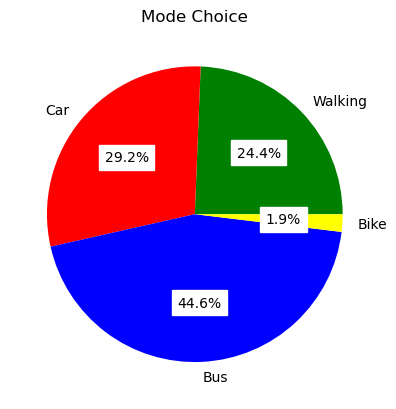

In [38]:
travels_walking = filter_dataframe_by_mode(viajes_df, 'Walking')
travels_walking_prop = len(travels_walking) / len(viajes_df)
travels_car = filter_dataframe_by_mode(viajes_df, 'Car')
travels_car_prop = len(travels_car) / len(viajes_df)
travels_bus = filter_dataframe_by_mode(viajes_df, 'Bus')
travels_bus_prop = len(travels_bus) / len(viajes_df)
travels_bike = filter_dataframe_by_mode(viajes_df, 'Bike')
travels_bike_prop = len(travels_bike) / len(viajes_df)

modes = ["Walking", "Car", "Bus", "Bike"]
fig, ax = pyplot.subplots()

ax.pie([travels_walking_prop,travels_car_prop,travels_bus_prop,travels_bike_prop], labels = modes, autopct='%1.1f%%',colors=["green", "red", "blue", "yellow"],textprops={"color": "black", "backgroundcolor": "white"})


ax.set(aspect="equal", title='Mode Choice')
pyplot.show()

      